In [1]:
import kaggle
!kaggle datasets download -d new-york-city/nyc-property-sales

nyc-property-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
from zipfile import ZipFile
file_name = 'nyc-property-sales.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [4]:
df = pd.read_csv('nyc-rolling-sales.csv', na_values= [' -  '])
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  58296 non-null float64
GR

In [6]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [7]:
df.fillna(0, inplace= True)

In [8]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,0.0,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,0.0,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [9]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [10]:
import math
import statistics
import numpy as np
import scipy.stats

### Mean dari Harga Penjualan pada setiap wilayah di New York

In [11]:
Manhattan = df[df['BOROUGH'] == 1]
Bronx  = df[df['BOROUGH'] == 2]
Brooklyn  = df[df['BOROUGH'] == 3]
Queens  = df[df['BOROUGH'] == 4]
Stat_Island  = df[df['BOROUGH'] == 5]

mean_man_sale_prc = Manhattan['SALE PRICE'].astype(int).mean()
print('Mean dari Harga Penjualan di Manhattan sebesar:', round(mean_man_sale_prc,2))

mean_bro_sale_prc = Bronx['SALE PRICE'].astype(int).mean()
print('Mean dari Harga Penjualan di Bronx sebesar:', round(mean_bro_sale_prc,2))

mean_brklyn_sale_prc = Brooklyn['SALE PRICE'].astype(int).mean()
print('Mean dari Harga Penjualan di Brooklyn sebesar:', round(mean_brklyn_sale_prc,2))

mean_que_sale_prc = Queens['SALE PRICE'].astype(int).mean()
print('Mean dari Harga Penjualan di Queens sebesar:', round(mean_que_sale_prc,2))

mean_si_sale_prc = Stat_Island['SALE PRICE'].astype(int).mean()
print('Mean dari Harga Penjualan di Staten Island sebesar:', round(mean_si_sale_prc,2))


Mean dari Harga Penjualan di Manhattan sebesar: 2394799.23
Mean dari Harga Penjualan di Bronx sebesar: 590193.64
Mean dari Harga Penjualan di Brooklyn sebesar: 834488.37
Mean dari Harga Penjualan di Queens sebesar: 510347.65
Mean dari Harga Penjualan di Staten Island sebesar: 388443.62


### Median dari tahun properti pada setiap wilayah di New York

In [12]:
med_man_year = Manhattan['YEAR BUILT'].median()
print('Median dari Tahun Properti dibangun di Manhattan yaitu:', round(med_man_year))

med_bro_year = Bronx['YEAR BUILT'].median()
print('Median dari Tahun Properti dibangun di Bronx yaitu:', round(med_bro_year))

med_brklyn_year = Brooklyn['YEAR BUILT'].median()
print('Median dari Tahun Properti dibangun di Brooklyn yaitu:', round(med_brklyn_year))

med_que_year = Queens['YEAR BUILT'].median()
print('Median dari Tahun Properti dibangun di Queens yaitu:', round(med_que_year))

med_si_year = Stat_Island['YEAR BUILT'].median()
print('Median dari Tahun Properti dibangun di Staten Island yaitu:', round(med_si_year))

Median dari Tahun Properti dibangun di Manhattan yaitu: 1938
Median dari Tahun Properti dibangun di Bronx yaitu: 1932
Median dari Tahun Properti dibangun di Brooklyn yaitu: 1930
Median dari Tahun Properti dibangun di Queens yaitu: 1945
Median dari Tahun Properti dibangun di Staten Island yaitu: 1973


### Modus dari Block properti pada setiap wilayah di New York

In [13]:
mod_man_block = statistics.mode(Manhattan['BLOCK'])
print('Modus atau mode dari block properti di Manhattan yaitu:',mod_man_block)

mod_bro_block = statistics.mode(Bronx['BLOCK'])
print('Modus atau mode dari block properti dibangun di Bronx yaitu:', mod_bro_block)

mod_brklyn_block = statistics.mode(Brooklyn['BLOCK'])
print('Modus atau mode dari block properti di Brooklyn yaitu:', mod_brklyn_block)

mod_que_block = statistics.mode(Queens['BLOCK'])
print('Modus atau mode dari block properti di Queens yaitu:', mod_que_block)

mod_si_block = statistics.mode(Stat_Island['BLOCK'])
print('Modus atau mode dari block properti di Staten Island yaitu:', mod_si_block)

Modus atau mode dari block properti di Manhattan yaitu: 16
Modus atau mode dari block properti dibangun di Bronx yaitu: 3944
Modus atau mode dari block properti di Brooklyn yaitu: 2135
Modus atau mode dari block properti di Queens yaitu: 5066
Modus atau mode dari block properti di Staten Island yaitu: 2450


### Range dari Total unit properti di New York

In [14]:
Total_Units = df['TOTAL UNITS']

In [15]:
np.ptp(Total_Units)

C:\Users\ACER\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


2261

### Variance dari Total unit properti di New York

In [16]:
statistics.variance(Total_Units)

359.958960030383

### Standar Deviasi dari Total unit properti di New York

In [17]:
Total_Units.std(ddof=1)

18.972584432023222

### Distribusi dari harga penjualan properti di New York

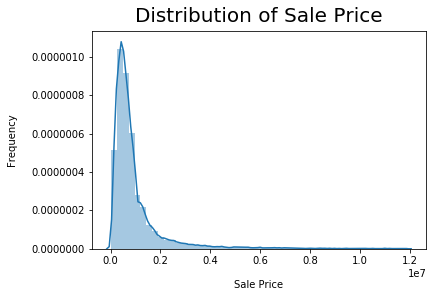

In [18]:
dist_sls_prc = df.loc[(df['COMMERCIAL UNITS']==0) & (df['SALE PRICE']>10000)]

# remove outlier
z_scores = stats.zscore(dist_sls_prc[['SALE PRICE']])
z_scores
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = dist_sls_prc[filtered_entries]
new_df.describe()
df_sales = new_df[['SALE PRICE']].dropna()

# Show Distribution Graph
sales = sns.distplot(df_sales)
plt.title("Distribution of Sale Price", y = 1.015, fontsize = 20)
plt.xlabel('Sale Price', labelpad = 14)
plt.ylabel('Frequency', labelpad = 14)
plt.show()

### Rata-rata harga jual tanah di NYC

In [19]:
rata_rata = df_sales.mean()
simpangan_baku = df_sales.std()
se = simpangan_baku/np.sqrt(len(df_sales))
z = 1.96

batas_bawah = rata_rata - z * se
batas_atas = rata_rata + z * se
print("Rata-rata harga jual di NYC berkisar antara %.3f sampai dengan %.3f" % (batas_bawah, batas_atas))

Rata-rata harga jual di NYC berkisar antara 962166.154 sampai dengan 982910.585


In [20]:
print("Statistik Uji: (ANOVA)")
data1 = Manhattan[['SALE PRICE']]
data2 = Bronx[['SALE PRICE']]
data3 = Brooklyn[['SALE PRICE']]
data4 = Queens[['SALE PRICE']]
data5 = Stat_Island[['SALE PRICE']]

stat, p = f_oneway(data1, data2, data3, data4, data5)
print('stat = %.3f, p = %.3f' % (stat, p))
print('Hasil Kesimpulan:')
if p > 0.05:
    print('Rata-rata harga jual properti di NYC sama')
else:
    print('Rata-rata harga jual properti di NYC tidak sama')

Statistik Uji: (ANOVA)
stat = 139.763, p = 0.000
Hasil Kesimpulan:
Rata-rata harga jual properti di NYC tidak sama
